# Lab 8: Define and Solve an ML Problem of Your Choosing

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns


In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [3]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(airbnbDataSet_filename)
print(df.columns)


Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [4]:
print(df.shape)
print(df.head(5))

(28022, 50)
                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2           Spacious Brooklyn Duplex, Patio + Garden   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, clean, spa...   

                               neighborhood_overview    host_name  \
0  Centrally located in the heart of Manhattan ju...     Jennifer   
1  Just the right mix of urban center and local n...  LisaRoxanne   
2                                                NaN      Rebecca   
3    Theater district, many restaurant

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. Airbnb Dataset
2. I will not be predicting a predefined outcome. Instead, the goal is to discover hidden structures within the data by identifying natural groupings of Airbnb listings. This will help define distinct market segments
3. This is an unsupervised task, no predefined labels or target variable will be used. This is a clustering problem, and I will be grouping similar data points together based on their features. Since this is a clustering problem, binary classification and multi-class classification do not apply here.
4. My initial list of features includes price, accomodates, minimum_nights, room_type, review_scores_location, and amenities.
5. This is an important problem because there is a need for companies to discover and understand the hidden market segments within the listings. Identifying these groups will allow these companies to create highly specific marketing campaigns to target users. Moreover, by understanding the characteristics of different segments, these companies can build better dynamic pricing tools, suggesting optimal prices to hosts based on which market segment their listing falls into. Also, the analysis can reveal gaps in the market. For instance, if the model discovers that there is demand for "pet-friendly stays" but there is a low supply of such listings in a certain neighborhood, Airbnb can launch initiatives to encourage hosts to fill that niche.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
#Data preparation - Checking for missingness
print(df.dtypes)

name                                             object
description                                      object
neighborhood_overview                            object
host_name                                        object
host_location                                    object
host_about                                       object
host_response_rate                              float64
host_acceptance_rate                            float64
host_is_superhost                                  bool
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                               bool
host_identity_verified                             bool
neighbourhood_group_cleansed                     object
room_type                                        object
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        

In [6]:
print(df.isna().sum())

name                                                5
description                                       570
neighborhood_overview                            9816
host_name                                           0
host_location                                      60
host_about                                      10945
host_response_rate                              11843
host_acceptance_rate                            11113
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
neighbourhood_group_cleansed                        0
room_type                                           0
accommodates                                        0
bathrooms                                           0
bedrooms                                         2918
beds                        

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. Kept Features: A curated set of ~45 features was chosen, including core numerical columns (price, accommodates, minimum_nights, review_scores_rating), one-hot encoded room_type columns, and 35 one-hot encoded columns derived from the amenities text data.
Removed Features: All irrelevant text columns (name, description), ID columns, and redundant columns (e.g., keeping only one availability column) were removed to reduce noise.

2. Several data preparation techniques will be used to create a clean, numerical dataset suitable for clustering; one-hot-encoding on room_type into numerical column; getting rid of outliers in susceptible columns. Using StandardScaler to transform all final features to the same scale, ensuring they contribute equally to the distance-based K-Means algorithm.

3. The model for this project is K-Means Clustering. This is an unsupervised learning algorithm chosen because the goal is to discover natural groupings (market segments) in the data without any predefined labels.

4. The plan is to build, validate, and interpret the model as follows:
    Model Building: The primary hyperparameter for K-Means, the number of clusters (K), will be determined using the Elbow Method. This involves training the model with a range of K values and plotting the inertia to find the optimal "elbow" point.
    Model Training: A final K-Means model will be trained on the fully prepared and scaled data using the optimal K value identified.
Performance Analysis & Validation: Since this is an unsupervised problem, performance isn't measured by traditional accuracy. Validation will be done by:
    Qualitative Analysis: Analyzing the characteristics of the resulting clusters to ensure they are distinct, logical, and represent meaningful, real-world market segments.

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [7]:
import ast
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:
print(df['room_type'].unique())
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)
print(df.head(10))

['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
                                                name  \
0                              Skylit Midtown Castle   
1  Whole flr w/private bdrm, bath & kitchen(pls r...   
2           Spacious Brooklyn Duplex, Patio + Garden   
3                   Large Furnished Room Near B'way　   
4                 Cozy Clean Guest Room - Family Apt   
5     Lovely Room 1, Garden, Best Area, Legal rental   
6                   Only 2 stops to Manhattan studio   
7                            UES Beautiful Blue Room   
8  Amazing location! Wburg. Large, bright & tranquil   
9        Perfect for Your Parents:  Privacy + Garden   

                                         description  \
0  Beautiful, spacious skylit studio in the heart...   
1  Enjoy 500 s.f. top floor in 1899 brownstone, w...   
2  We welcome you to stay in our lovely 2 br dupl...   
3  Please don’t expect the luxury here just a bas...   
4  Our best guests are seeking a safe, cl

In [9]:
#preparing amenities column
print(df['amenities'][1])
df['amenities'] = df['amenities'].apply(lambda x: ast.literal_eval(x))
all_amenities = [amenity.strip() for sublist in df['amenities'] for amenity in sublist]
top_n = 35  
top_amenities = [item for item, count in Counter(all_amenities).most_common(top_n)]
print("\n")
print(top_amenities)


["Extra pillows and blankets", "Luggage dropoff allowed", "Free parking on premises", "Pack \u2019n play/Travel crib", "Microwave", "Hangers", "Lockbox", "Long term stays allowed", "Carbon monoxide alarm", "High chair", "Wifi", "Heating", "Shampoo", "Dishes and silverware", "Air conditioning", "Free street parking", "Essentials", "Hot water", "Bathtub", "Kitchen", "Cable TV", "Fire extinguisher", "Cooking basics", "Dedicated workspace", "Hair dryer", "Stove", "Children\u2019s books and toys", "TV with standard cable", "Smoke alarm", "Iron", "Oven", "Refrigerator", "Bed linens", "Baby safety gates", "Coffee maker"]


['Wifi', 'Essentials', 'Long term stays allowed', 'Smoke alarm', 'Heating', 'Kitchen', 'Air conditioning', 'Hangers', 'Carbon monoxide alarm', 'Hair dryer', 'Iron', 'Hot water', 'Shampoo', 'Dedicated workspace', 'Dishes and silverware', 'Refrigerator', 'Cooking basics', 'Microwave', 'TV', 'Free street parking', 'Fire extinguisher', 'Coffee maker', 'Bed linens', 'Stove', 'Ov

In [10]:
for amenity in top_amenities:
    df[f'amenity_{amenity}'] = df['amenities'].apply(lambda x: 1 if amenity in x else 0)
df.drop(columns=['amenities'], inplace=True)

In [11]:
df.head(5)
print(df.columns)

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
     

In [12]:
#handling outliers
columns_to_cap = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month'
]

for col in columns_to_cap:
    # Calculate the 99th percentile as the cap
    cap = df[col].quantile(0.99)
    # Apply the cap
    df[col] = df[col].apply(lambda x: min(x, cap))
    print(f"Outliers in '{col}' have been capped at {cap:.2f}")

Outliers in 'price' have been capped at 898.37
Outliers in 'minimum_nights' have been capped at 74.37
Outliers in 'number_of_reviews' have been capped at 268.79
Outliers in 'reviews_per_month' have been capped at 18.97


In [13]:
numerical_features = [
    'price',
    'accommodates',
    'bathrooms',
    'bedrooms',
    'beds',
    'minimum_nights',
    'availability_365',
    'number_of_reviews',
    'review_scores_rating',
    'reviews_per_month'
]

encoded_features = [col for col in df.columns if col.startswith('room_type_') or col.startswith('amenity_')]
final_feature_list = numerical_features + encoded_features
df_final_features = df[final_feature_list]
df_final_features = df_final_features.fillna(df_final_features.median())
print(df_final_features.shape)
print(df_final_features.head())

(28022, 48)
   price  accommodates  bathrooms  bedrooms  beds  minimum_nights  \
0  150.0             1        1.0       1.0   1.0            30.0   
1   75.0             3        1.0       1.0   3.0             1.0   
2  275.0             4        1.5       2.0   2.0             5.0   
3   68.0             2        1.0       1.0   1.0             2.0   
4   75.0             1        1.0       1.0   1.0             2.0   

   availability_365  number_of_reviews  review_scores_rating  \
0               338              48.00                  4.70   
1               194             268.79                  4.45   
2               123               2.00                  5.00   
3               192             268.79                  4.21   
4                 0             118.00                  4.91   

   reviews_per_month  ...  amenity_First aid kit  amenity_Washer  \
0               0.33  ...                      0               0   
1               4.86  ...                      0    

In [14]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_final_features)
df_scaled = pd.DataFrame(scaled_features, columns=df_final_features.columns)
df_scaled.head(5)

,price,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_365,number_of_reviews,review_scores_rating,reviews_per_month,...,amenity_First aid kit,amenity_Washer,amenity_Dryer,amenity_Extra pillows and blankets,amenity_Private entrance,amenity_Lock on bedroom door,amenity_Elevator,amenity_Luggage dropoff allowed,amenity_Cable TV,amenity_TV with standard cable
0,-0.024653,-1.007673,-0.337606,-0.440314,-0.555409,0.820632,1.494669,0.340644,0.032654,-0.437756,...,-0.802377,-0.738484,-0.721769,1.525529,-0.601838,-0.586169,-0.543283,1.887815,-0.521529,-0.504936
1,-0.577139,0.067470,-0.337606,-0.440314,1.298622,-1.113920,0.458908,4.691337,-0.461566,1.116767,...,-0.802377,-0.738484,-0.721769,1.525529,-0.601838,-0.586169,-0.543283,1.887815,1.917438,1.980451
2,0.896157,0.605041,0.849692,1.050381,0.371607,-0.847085,-0.051779,-0.565791,0.625717,-0.544136,...,-0.802377,1.354125,1.385484,-0.655510,-0.601838,-0.586169,-0.543283,-0.529713,1.917438,1.980451
3,-0.628704,-0.470102,-0.337606,-0.440314,-0.555409,-1.047211,0.444523,4.691337,-0.936017,0.711836,...,-0.802377,-0.738484,-0.721769,1.525529,-0.601838,1.705992,-0.543283,1.887815,-0.521529,-0.504936
4,-0.577139,-1.007673,-0.337606,-0.440314,-0.555409,-1.047211,-0.936492,1.720002,0.447798,-0.252449,...,-0.802377,-0.738484,-0.721769,-0.655510,-0.601838,-0.586169,1.840662,-0.529713,-0.521529,-0.504936


In [15]:
#Finding optimal K
inertia_scores = []
k_range =  range(2,11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init='auto')
    kmeans.fit(df_scaled)
    inertia_scores.append(kmeans.inertia_)

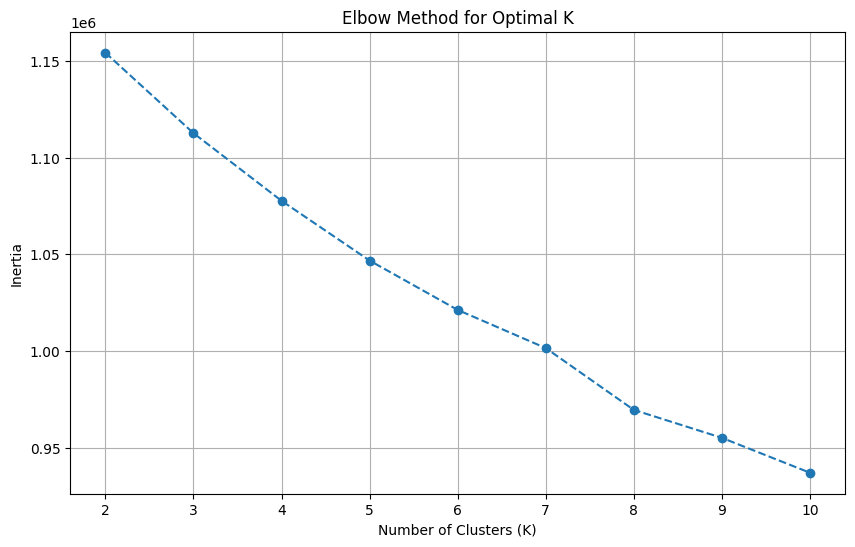

In [16]:
# --- Plot the results ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [19]:
#From the graph, the optimal value for K would be 5.
#The point at K=5 is the "elbow" where we get the best balance between having a low inertia and not having too many clusters
#Now it is time to train the final K-Means model and then analyze the resulting segments

# 1. Create and train the final model with K=5
kmeans = KMeans(n_clusters=5, random_state=1234, n_init='auto')
kmeans.fit(df_scaled)

# 2. Get the cluster labels for each listing
cluster_labels = kmeans.labels_

df_final_features['cluster'] = cluster_labels

print(df_final_features.head())

   price  accommodates  bathrooms  bedrooms  beds  minimum_nights  \
0  150.0             1        1.0       1.0   1.0            30.0   
1   75.0             3        1.0       1.0   3.0             1.0   
2  275.0             4        1.5       2.0   2.0             5.0   
3   68.0             2        1.0       1.0   1.0             2.0   
4   75.0             1        1.0       1.0   1.0             2.0   

   availability_365  number_of_reviews  review_scores_rating  \
0               338              48.00                  4.70   
1               194             268.79                  4.45   
2               123               2.00                  5.00   
3               192             268.79                  4.21   
4                 0             118.00                  4.91   

   reviews_per_month  ...  amenity_Washer  amenity_Dryer  \
0               0.33  ...               0              0   
1               4.86  ...               0              0   
2               0.02

In [20]:
# Analyzing the characteristics of each cluster
cluster_analysis = df_final_features.groupby('cluster').mean()
print("\n--- Analysis of Each Cluster ---")
print(cluster_analysis)


--- Analysis of Each Cluster ---
              price  accommodates  bathrooms  bedrooms      beds  \
cluster                                                            
0        151.115576      2.706642   1.150669  1.242666  1.456935   
1        136.896860      2.562517   1.069852  1.154373  1.397176   
2        132.074090      2.328779   1.067569  1.121600  1.284934   
3        362.040776      6.915216   1.790049  2.857653  3.943775   
4        126.313833      2.603887   1.083887  1.157895  1.494575   

         minimum_nights  availability_365  number_of_reviews  \
cluster                                                        
0             24.895464         84.305093           9.618017   
1             20.573012        126.222512          25.384816   
2             19.930053        105.659918          15.059745   
3             12.571651        181.905846          37.372981   
4              8.286951        179.792874          69.554479   

         review_scores_rating  reviews_p

In [ ]:
# Cluster 3: Luxury Group & Family Stays 
# This is the most distinct high-end segment, defined by having the highest values in almost every category. These are large, premium properties for families or groups.
# Price: $362 (Highest by far)
# Accommodates: 6.9 (Highest)
# Bedrooms/Beds: Highest count
# Review Score: 4.73 (Excellent)

# Cluster 4: Top-Rated Tourist Hotspots 
# This segment represents the ideal short-term rental for tourists. It's defined by a low minimum stay, high turnover, and the best reviews, indicating these are popular, professionally managed listings.
# Price: $126 (Lowest)
# Minimum Nights: 8.3 (Lowest)
# Reviews Per Month: 3.45 (Highest by far)
# Review Score: 4.77 (Highest)

# Cluster 0: Premium Long-Term Rentals 
# This cluster is clearly for long-term guests who want premium amenities. The high minimum stay is the main signal, but the key differentiator is the near-universal presence of laundry facilities.
# Minimum Nights: 24.9 (Highest)
# Reviews Per Month: 0.45 (Lowest, indicating low turnover)
# Amenities: Nearly all have a Washer (98%) and Dryer (97%).

# Cluster 1: Standard Extended Stays 
# This is another long-stay segment but represents a more standard, mid-tier option compared to Cluster 0. It has a slightly lower minimum stay requirement and less comprehensive amenities.
# Minimum Nights: 20.6 (High)
# Price: $137 (Mid-range)
# Amenities: Decent, but lacking the universal laundry of the premium long-term cluster.

# Cluster 2: Basic & Budget Long-Stay Rooms 
# This represents the no-frills, budget option for long-term stays. It has the lowest review scores and a stark lack of amenities, making it suitable for students or those on a very tight budget.
# Review Score: 4.58 (Lowest)
# Minimum Nights: 19.9 (High)
# Amenities: Extremely low across the board, especially Washer (3%) and Dryer (1%).